# Polynomial Regression using Scikit-Learn - Auto MPG

#### Python Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
%matplotlib inline
plt.style.use('seaborn')
np.random.seed(101)

#### Create X-coordinate points for the polynomial

In [3]:
px = np.linspace(-3, 3, 100)

#### Plot a Quadratic (2nd-degree) polynomial

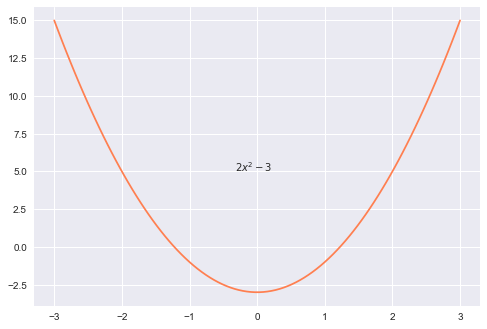

In [4]:
py2 = 2*np.power(px, 2) - 3
plt.plot(px, py2, color='coral')
plt.annotate('$2x^2 - 3$', (-0.05, 5.0), xytext=(-0.05, 5.0), ha='center')
plt.show()

#### Plot a Cubic (3rd-degree) polynomial

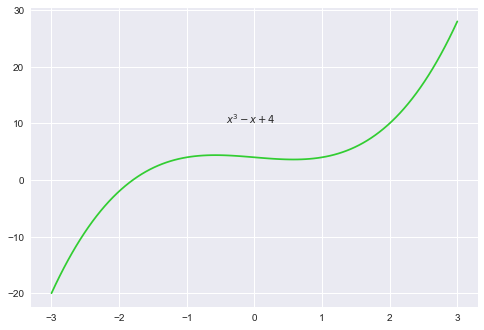

In [5]:
py3 = np.power(px, 3) - px + 4
plt.plot(px, py3, color='limegreen')
plt.annotate('$x^3 - x + 4$', (-0.05, 10.0), xytext=(-0.05, 10.0), ha='center')
plt.show()

#### Plot a Quartic (4th-degree) polynomial

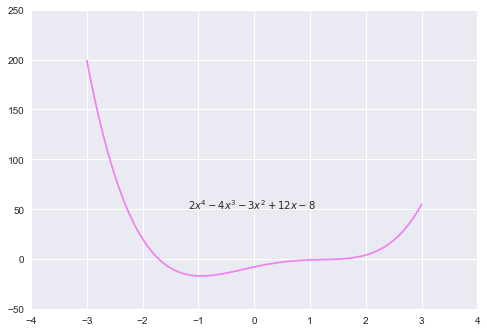

In [6]:
py4 = 2*np.power(px, 4) - 4*np.power(px, 3) - 3*np.power(px, 2) + 12*px - 8
plt.xlim(xmin=-4, xmax=4)
plt.ylim(ymin=-50, ymax=250)
plt.plot(px, py4, color='violet')
plt.annotate('$2x^4 - 4x^3 - 3x^2 + 12x - 8$', (-0.05, 50.0), xytext=(-0.05, 50.0), ha='center')
plt.show()

#### Load the Auto MPG Data Set
Source: [UCI Machine Learning Repository - Auto MPG Data Set](https://archive.ics.uci.edu/ml/datasets/Auto+MPG)

In [7]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
auto_df = pd.read_csv(url, delim_whitespace=True)
auto_df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']

#### Fix data types for the columns - horsepower and car_name

In [8]:
auto_df.horsepower = pd.to_numeric(auto_df.horsepower, errors='coerce')
auto_df.car_name = auto_df.car_name.astype('string')

#### Eliminate null values in horseposer

In [9]:
auto_df = auto_df[auto_df.horsepower.notnull()]

## Model - 1 (displacement vs mpg)

#### Create the training and test datasets (displacement and mpg)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(auto_df[['displacement']], auto_df['mpg'], test_size=0.25, random_state=101)
X_train.shape, y_train.shape

((293, 1), (293,))

#### Display a scatter plot - displacement vs mpg

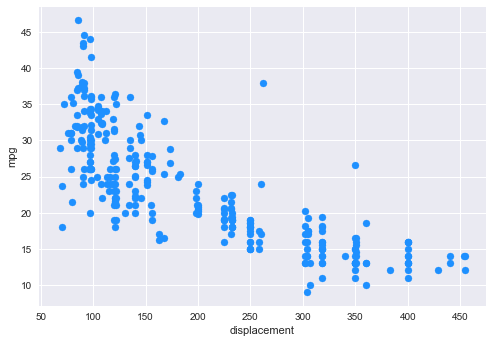

In [11]:
plt.scatter(X_train, y_train, color='dodgerblue')
plt.xlabel('displacement')
plt.ylabel('mpg')
plt.show()

#### Create a polynomial feature generator (displacement and mpg)

In [12]:
transformer = PolynomialFeatures(degree=2, include_bias=True)

#### Transform the training features to add polynomial features (displacement and mpg)

In [13]:
X_p_train = transformer.fit_transform(X_train)
X_p_train.shape

(293, 3)

#### Initialize and fit the Linear Regression model (displacement and mpg)

In [14]:
model = LinearRegression()
model.fit(X_p_train, y_train)

LinearRegression()

#### Display the intercept and the slope (displacement and mpg)

In [15]:
model.intercept_, model.coef_

(42.49733894443483, array([ 0.        , -0.14038966,  0.000171  ]))

#### Predict outcomes using the test data (displacement and mpg)

In [16]:
X_p_test = transformer.fit_transform(X_test)
y_predict = model.predict(X_p_test)
X_test.shape, y_predict.shape

((98, 1), (98,))

#### Plot the test data and the polynomial line of best fit (displacement and mpg)

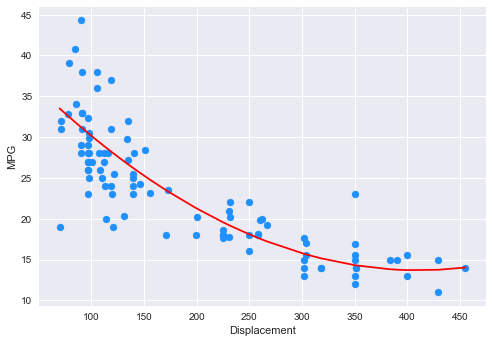

In [17]:
plt.scatter(X_test, y_test, color='dodgerblue')
sorted_Xy = sorted(zip(X_test.displacement, y_predict))
X_s, y_s = zip(*sorted_Xy)
plt.plot(X_s, y_s, color='red')
plt.xlabel('Displacement')
plt.ylabel('MPG')
plt.show()

#### Display R-Squared value (displacement and mpg)

In [18]:
r2_score(y_test, y_predict)

0.702509211169476

In [19]:
mean_squared_error(y_test, y_predict, squared=False)

4.008353173218597